In [1]:
import matplotlib.pyplot as plt

import sys
import os
sys.path.append('..')

import my_datasets

from MyEnsemble import MyIF, MyEIF, MyNNIF, MyDIF

import numpy as np

import pandas as pd

In [6]:
def score_plot(model_class, interpretation, dataset_name):

    folder = model_class.__name__

    GFIs_mean = pd.read_csv(f'{folder}\{interpretation}\{dataset_name}\{dataset_name}_mean.csv', index_col=0).to_numpy().reshape(-1)
    GFIs_sem = pd.read_csv(f'{folder}\{interpretation}\{dataset_name}\{dataset_name}_sem.csv', index_col=0).to_numpy().reshape(-1)

    print(GFIs_mean)
    print(GFIs_sem)

    GFIs_norm = np.linalg.norm(GFIs_mean)
    GFIs_mean = GFIs_mean / GFIs_norm
    GFIs_std = GFIs_sem*np.sqrt(len(GFIs_mean))
    GFIs_std = GFIs_std / GFIs_norm
    

    n_features = len(GFIs_mean)
    colors = plt.cm.tab20(np.arange(n_features) % 20)
    y_positions = np.arange(n_features)

    fig, ax = plt.subplots(figsize=(6, n_features*0.3+2))

    ax.barh(y_positions, GFIs_mean, color=colors, alpha=0.8, xerr=GFIs_std, ecolor='black', capsize=5)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

    # Annotate bars
    for y, mean, std in zip(y_positions, GFIs_mean, GFIs_std):
        x_text = mean + std + 0.01
        ha = 'left'
        if x_text > ax.get_xlim()[1]:
            x_text = mean - 0.01
            ha = 'right'
        ax.text(x_text, y, f"{mean:.2f} ± {std:.2f}", va='center', ha=ha, fontsize=12, color='black')

    ax.set_yticks(y_positions)
    ax.set_yticklabels(y_positions + 1)
    ax.set_xlabel("Normalized GFI", fontsize=18)
    ax.set_ylabel("Features", fontsize=18)
    ax.set_xlim(0, 1.3)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout()
    plt.savefig(f'score_plots\{dataset_name}_{folder}_{interpretation}.pdf')
    return fig, ax



def sorted_score_plot(model_class, interpretation, dataset_name):

    folder = model_class.__name__

    GFIs_mean = pd.read_csv(f'{folder}\{interpretation}\{dataset_name}\{dataset_name}_mean.csv', index_col=0).to_numpy().reshape(-1)
    GFIs_sem = pd.read_csv(f'{folder}\{interpretation}\{dataset_name}\{dataset_name}_sem.csv', index_col=0).to_numpy().reshape(-1)
    GFIs = pd.read_csv(f'{folder}\{interpretation}\{dataset_name}\{dataset_name}.csv', index_col=0).to_numpy().reshape(-1, GFIs_mean.shape[0])

    GFIs_norm = np.linalg.norm(GFIs_mean)
    GFIs_mean = GFIs_mean / GFIs_norm
    GFIs_std = GFIs_sem*np.sqrt(len(GFIs_mean))
    GFIs_std = GFIs_std / GFIs_norm
    GFIs = GFIs / GFIs_norm
    
    n_features = len(GFIs_mean)
    colors = plt.cm.tab20(np.arange(n_features) % 20)
    y_positions = np.arange(n_features)

    sorting = np.argsort(GFIs_mean)
    GFIs_mean = GFIs_mean[sorting]
    GFIs = GFIs[:, sorting]
    colors = colors[sorting]

    fig, ax = plt.subplots(figsize=(6, n_features*0.3+2))

    bplot = ax.boxplot(GFIs, orientation="horizontal", positions=y_positions, patch_artist=True, widths=len(y_positions)*[0.8])
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)
    for median in bplot['medians']:
        median.set_color('black')
    ax.grid(linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

    ax.set_yticks(y_positions)
    ax.set_yticklabels(y_positions[sorting] + 1)
    ax.set_xlabel("Normalized GFI", fontsize=18)
    ax.set_ylabel("Features", fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout()
    plt.savefig(f'score_plots\{dataset_name}_{folder}_{interpretation}_sorted.pdf')
    return fig, ax

[3.78625301 2.95444929 3.84794716 4.01460727 2.94610008 4.17595451
 4.6613541  4.40160302 2.9901533  3.55341265 3.75786286 2.76224658
 3.67518499 4.30140471 2.90529738 3.90747405 3.96180182 3.51678755
 2.91400725 3.9630678  4.12277745 2.98316801 4.17304326 4.42880693
 2.98015588 3.93473398 4.07622899 3.97600871 2.9798467  3.61725487]
[0.03640662 0.02642993 0.03756399 0.03863217 0.02346063 0.04496113
 0.05047647 0.0459738  0.02852558 0.03646283 0.03538099 0.02625461
 0.03348281 0.04327344 0.04167132 0.04592646 0.04609284 0.03768062
 0.03990087 0.0500628  0.03856632 0.02326532 0.04048059 0.04085246
 0.01705133 0.04072854 0.03741263 0.03885223 0.02600903 0.03373285]


(<Figure size 600x1100 with 1 Axes>,
 <Axes: xlabel='Normalized GFI', ylabel='Features'>)

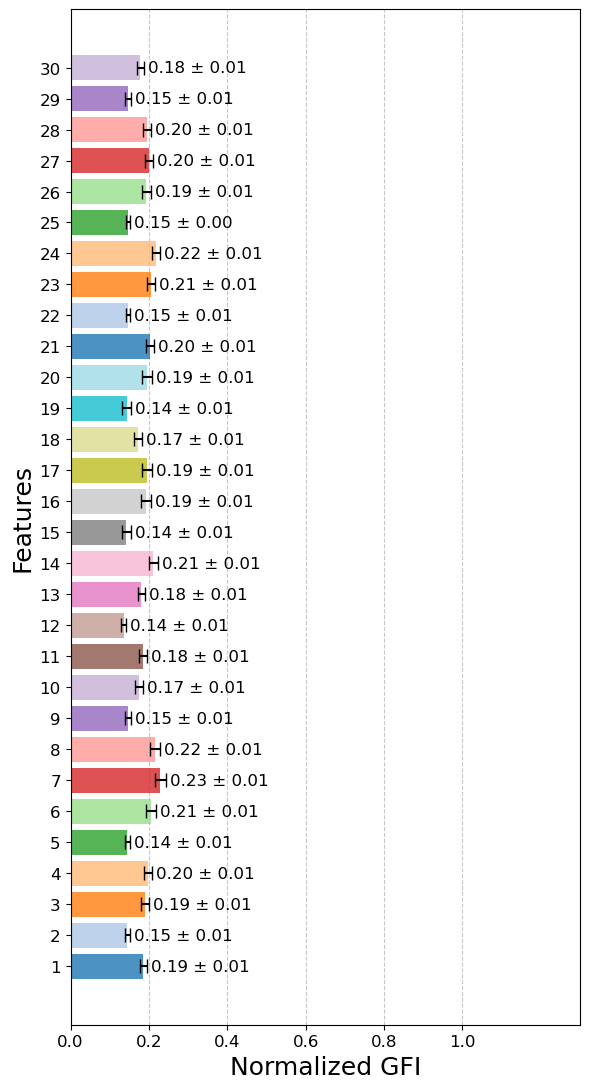

In [5]:
score_plot(MyIF, 'kNN', "wbc")

(<Figure size 600x1100 with 1 Axes>,
 <Axes: xlabel='Normalized GFI', ylabel='Features'>)

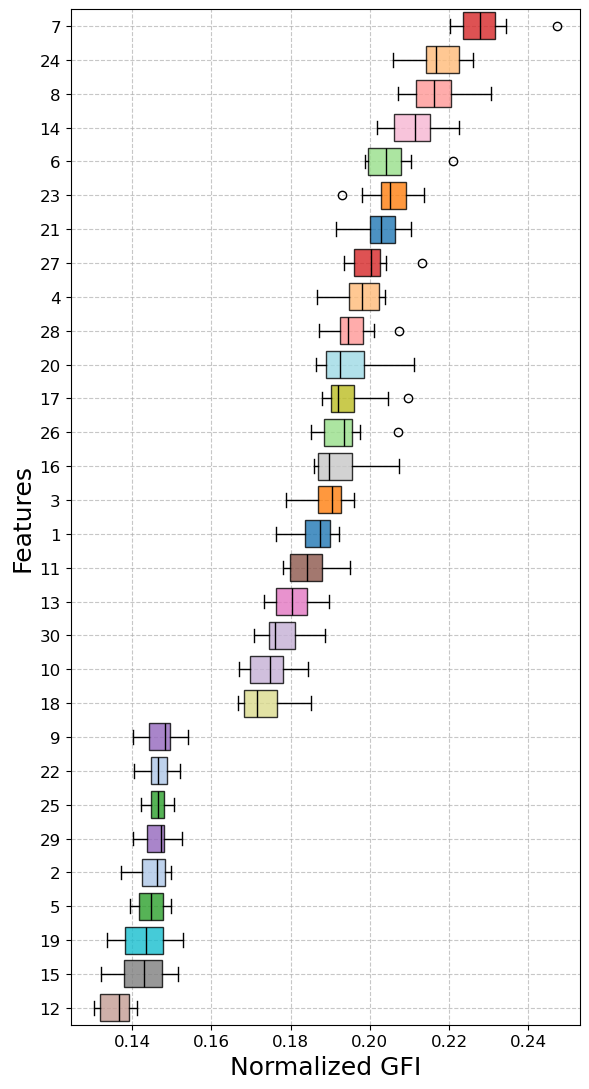

In [7]:
sorted_score_plot(MyIF, 'kNN', "wbc")